In [195]:
import pandas as pd

# carrega os dados da planilha
file_path = 'form.xlsx'
data = pd.read_excel(file_path)

# exibe o começo da estrutura para ver se não deu cagada
data.tail()

,Carimbo de data/hora,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13
31,2024-06-18 15:45:24.760,Desenvolvedor - Frontend,GIT,1-5,Saúde,Ferramenta própria,Gitea,Várias vezes ao dia,1,"Automação de builds, Testes automatizados, Dep...",5,Júnior,Em branco,Em branco
32,2024-06-18 15:49:45.274,Desenvolvedor - Backend,GIT,6-10,Ecommerce,Redmine,GitLab CI,Diariamente,3,Testes automatizados,5,Senior,Em branco,Em branco
33,2024-06-18 16:02:40.274,Desenvolvedor - Full stack,GIT,6-10,Comércio,Movidesk,Bitbucket pipelines,Várias vezes ao dia,2,Colaboração e comunicação,4,Júnior,Em branco,Em branco
34,2024-06-18 18:15:13.944,Analista de Qualidade / Produto / Teste,GIT,1-5,Varejo,Zoho,Não utiliza,Várias vezes ao dia,3,Monitoramento e logging,4,Júnior,Definição de prioridades.,Histórico
35,2024-06-18 18:56:58.639,DevOps,GIT,Mais de 50 pessoas,Financeiro,Ferramenta própria,Ferramenta interna,Diariamente,3,Testes automatizados,5,Pleno,Em branco,"segurança no deploy, sem risco de erro humano"


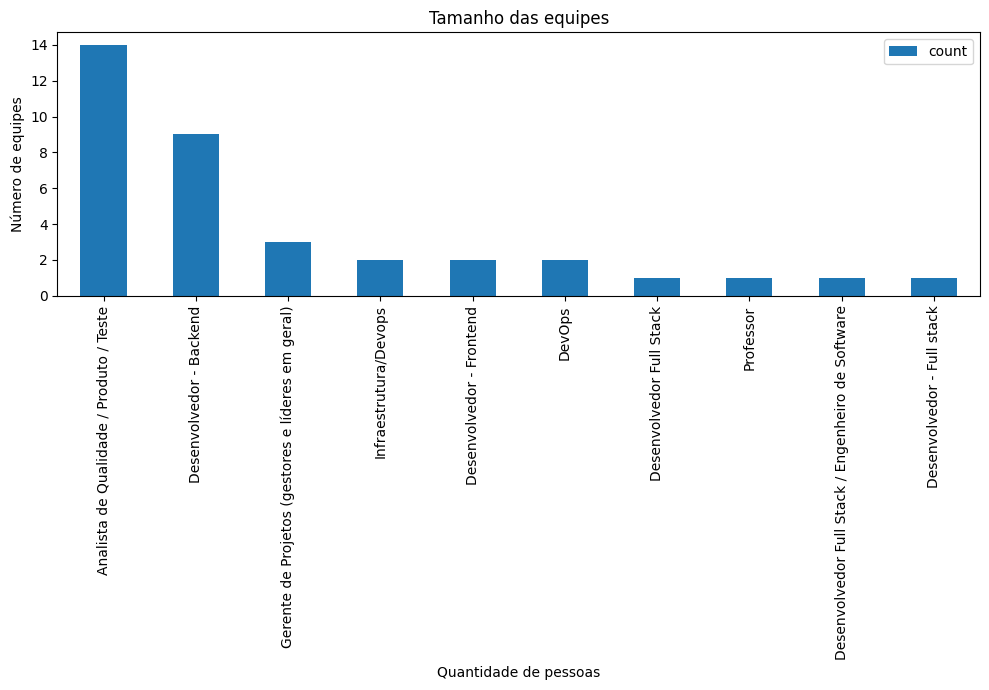

In [196]:
# faz a contagem dos cargos respondidos
contagem_cargos = data['P1'].value_counts()
contagem_cargos

contagem_cargos_df = pd.DataFrame(contagem_cargos)
contagem_cargos_df.plot(kind='bar', stacked=False, figsize=(10, 7))


import matplotlib.pyplot as plt

# adiciona titulo
plt.title('Tamanho das equipes')

# adiciona label eixo x
plt.xlabel('Quantidade de pessoas')

# adiciona label eixo y
plt.ylabel('Número de equipes')

# ajusta layout
plt.tight_layout()

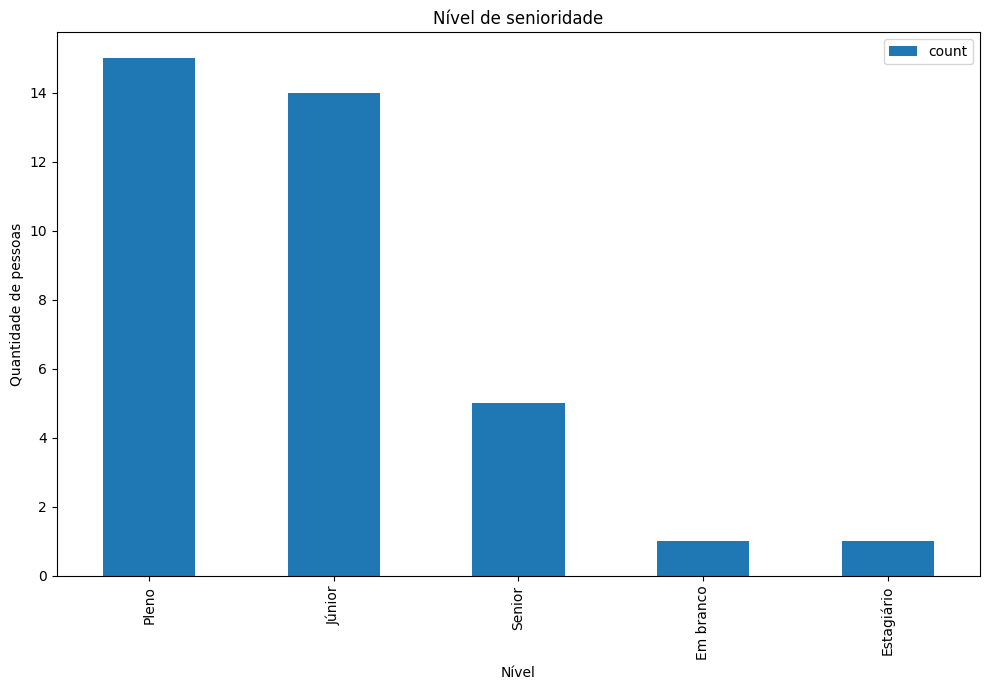

In [197]:
# faz a contagem da senioridade
contagem_senioridade = data['P11'].value_counts()
contagem_senioridade

contagem_senioridade_df = pd.DataFrame(contagem_senioridade)
contagem_senioridade_df.plot(kind='bar', stacked=False, figsize=(10, 7))


import matplotlib.pyplot as plt

# adiciona titulo
plt.title('Nível de senioridade')

# adiciona label eixo x
plt.xlabel('Nível')

# adiciona label eixo y
plt.ylabel('Quantidade de pessoas')

# ajusta layout
plt.tight_layout()

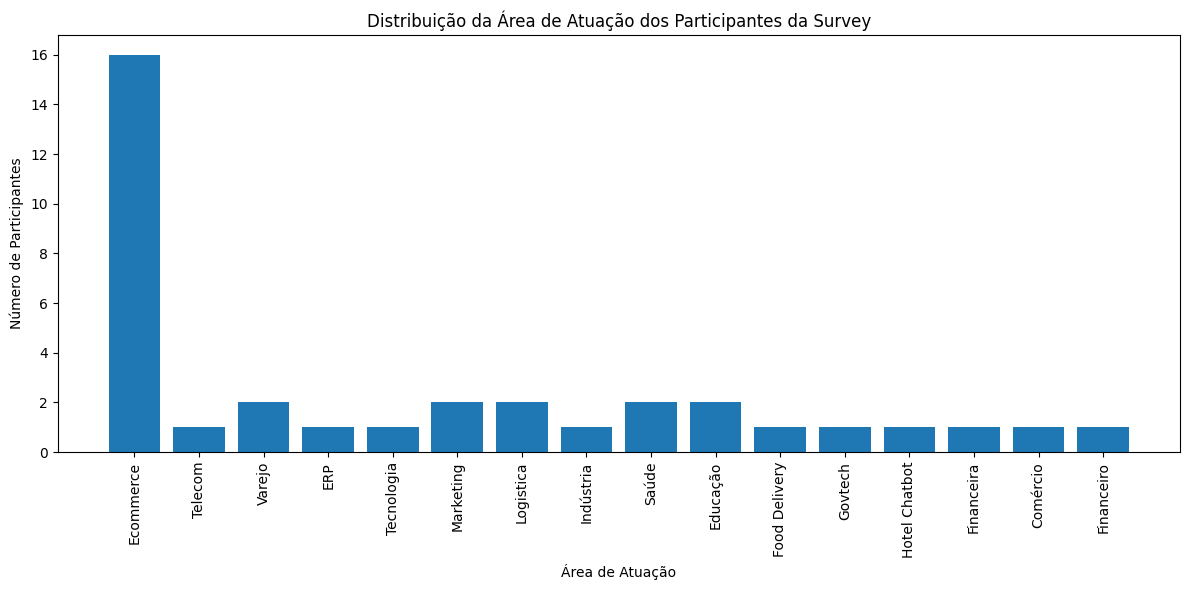

In [198]:
from collections import Counter

# Pergunta 4 tem os dados da área de atuação
areas = data['P4'].dropna()

# Separar as áreas que estão em uma mesma célula, caso haja múltiplas áreas separadas por vírgulas
todas_areas = []
for area in areas:
    areas_separadas = area.split(', ')
    todas_areas.extend(areas_separadas)

contagem_areas = Counter(todas_areas)

# Preparar os dados para o gráfico
labels, values = zip(*contagem_areas.items())

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.xlabel('Área de Atuação')
plt.ylabel('Número de Participantes')
plt.title('Distribuição da Área de Atuação dos Participantes da Survey')
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [199]:
# faz a contagem das ferramentas de controle de versão
ferramentas_controle_versao = data['P2'].str.get_dummies(sep=', ').sum()
ferramentas_controle_versao

GIT    34
SVN     2
dtype: int64

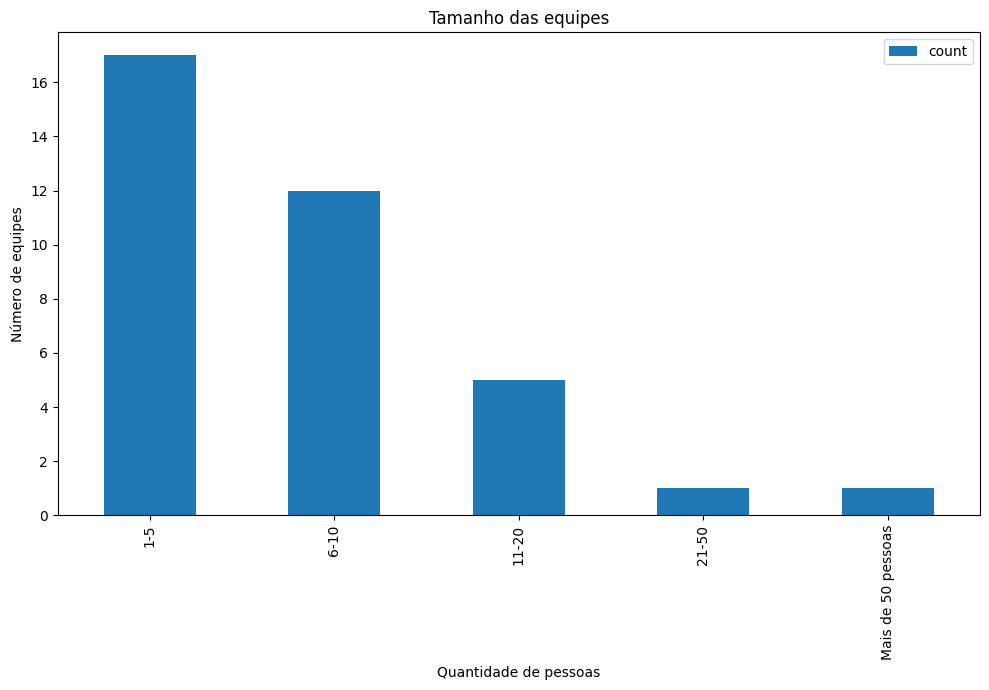

In [200]:
# faz a contagem do tamanho das equipes
tamanho_equipes = data['P3'].value_counts()
tamanho_equipes

tamanho_equipes_df = pd.DataFrame(tamanho_equipes)
tamanho_equipes_df.plot(kind='bar', stacked=False, figsize=(10, 7))


import matplotlib.pyplot as plt

# adiciona titulo
plt.title('Tamanho das equipes')

# adiciona label eixo x
plt.xlabel('Quantidade de pessoas')

# adiciona label eixo y
plt.ylabel('Número de equipes')

# ajusta layout
plt.tight_layout()

In [201]:
# faz a contagem da frequencia de integração de código
frequencia_integracao = data['P7'].value_counts()
frequencia_integracao

P7
Várias vezes ao dia             20
Diariamente (uma vez ao dia)     9
Diariamente                      3
Semanalmente                     2
Quinzenalmente                   1
Não realizo                      1
Name: count, dtype: int64

## QP1 - Quais ferramentas de gerenciamento são mais utilizadas por equipes de diferentes tamanhos?

In [202]:
# dicionario para armazenar os dados finais
ferramentas_por_tam_equipes = {}

# pega os tamanhos das equipes
tamanho_equipes = data['P3'].unique()

# para cada tamanho na lista
for tamanho in tamanho_equipes:

    # filtra os dados apenas do tamanho do loop
    subset = data[data['P3'] == tamanho]

    # conta as ferramentas de gerenciamento mencionadas na resposta da P5
    tool_counts = subset['P5'].str.get_dummies(sep=', ').sum()

    # adiciona no dicionário
    ferramentas_por_tam_equipes[tamanho] = tool_counts

# exibe dicionário na tela
ferramentas_por_tam_equipes

{'11-20': Ferramenta própria    1
 Jira                  3
 Redmine               1
 dtype: int64,
 '1-5': Asana                  2
 Azure                  1
 ClickUp                2
 Ferramenta própria     2
 GitLab Issue Boards    1
 Jira                   4
 Nenhuma                1
 Redmine                1
 Trello                 4
 Zoho                   1
 dtype: int64,
 '6-10': Asana                       2
 Jira                        8
 LucidChart (fluxogramas)    1
 Mantis Bug Tracker          1
 Miro                        1
 Movidesk                    1
 Planilhas                   1
 Redmine                     1
 Trello                      1
 dtype: int64,
 '21-50': Jira    1
 dtype: int64,
 'Mais de 50 pessoas': Ferramenta própria    1
 dtype: int64}

In [203]:
# converte para o dataframe do pandas
tools_df = pd.DataFrame(ferramentas_por_tam_equipes)
tools_df

,11-20,1-5,6-10,21-50,Mais de 50 pessoas
Asana,NaN,2.0,2.0,NaN,NaN
Azure,NaN,1.0,NaN,NaN,NaN
ClickUp,NaN,2.0,NaN,NaN,NaN
Ferramenta própria,1.0,2.0,NaN,NaN,1.0
GitLab Issue Boards,NaN,1.0,NaN,NaN,NaN
Jira,3.0,4.0,8.0,1.0,NaN
LucidChart (fluxogramas),NaN,NaN,1.0,NaN,NaN
Mantis Bug Tracker,NaN,NaN,1.0,NaN,NaN
Miro,NaN,NaN,1.0,NaN,NaN
Movidesk,NaN,NaN,1.0,NaN,NaN


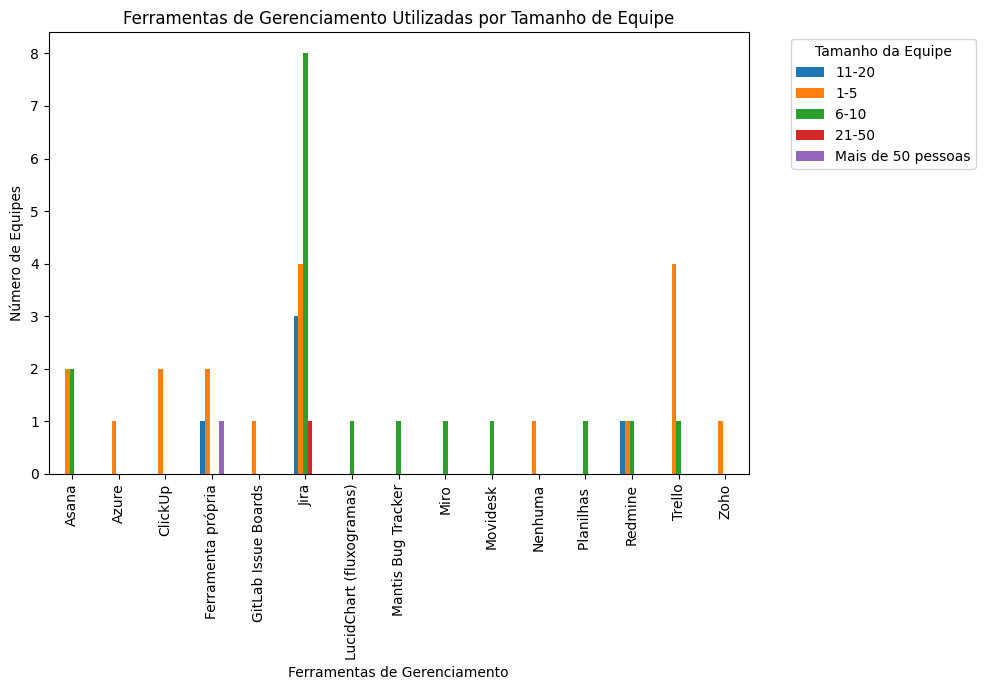

In [204]:
import matplotlib.pyplot as plt

# faz o plot do gráfico ferramentas x tamanho equipe
tools_df.plot(kind='bar', stacked=False, figsize=(10, 7))

# adiciona titulo
plt.title('Ferramentas de Gerenciamento Utilizadas por Tamanho de Equipe')

# adiciona label eixo x
plt.xlabel('Ferramentas de Gerenciamento')

# adiciona label eixo y
plt.ylabel('Número de Equipes')

# adiciona legenda
plt.legend(title='Tamanho da Equipe', bbox_to_anchor=(1.05, 1), loc='upper left')

# ajusta layout
plt.tight_layout()

## QP2 - Como a função desempenhada influencia a adoção de práticas de integração e uso de ferramentas específicas?

In [205]:
# pega as funcoes respondidas no formulario
funcoes = data['P1'].unique()
funcoes

array(['Analista de Qualidade / Produto / Teste',
       'Gerente de Projetos (gestores e líderes em geral)',
       'Desenvolvedor - Backend', 'Infraestrutura/Devops',
       'Desenvolvedor Full Stack', 'Desenvolvedor - Frontend',
       'Professor', 'DevOps',
       'Desenvolvedor Full Stack / Engenheiro de Software',
       'Desenvolvedor - Full stack'], dtype=object)

In [206]:
# dicionário para armazenar as contagens das práticas e ferramentas por função
frequencia_integracao_por_funcao = {}
ferramentas_por_funcao = {}

# loop sobre cada função e contar as práticas e ferramentas
for funcao in funcoes:
    # filtrar dados para a função atual
    subset = data[data['P1'] == funcao]
    
    # contar as práticas de integração contínua
    integration_counts = subset['P7'].value_counts()
    
    # contar as ferramentas específicas utilizadas
    tool_counts = subset['P5'].str.get_dummies(sep=', ').sum()
    
    # armazenar as contagens nos dicionários
    frequencia_integracao_por_funcao[funcao] = integration_counts
    ferramentas_por_funcao[funcao] = tool_counts

(frequencia_integracao_por_funcao, ferramentas_por_funcao)

({'Analista de Qualidade / Produto / Teste': P7
  Várias vezes ao dia             8
  Diariamente (uma vez ao dia)    3
  Quinzenalmente                  1
  Não realizo                     1
  Semanalmente                    1
  Name: count, dtype: int64,
  'Gerente de Projetos (gestores e líderes em geral)': P7
  Várias vezes ao dia             2
  Diariamente (uma vez ao dia)    1
  Name: count, dtype: int64,
  'Desenvolvedor - Backend': P7
  Diariamente (uma vez ao dia)    4
  Várias vezes ao dia             4
  Diariamente                     1
  Name: count, dtype: int64,
  'Infraestrutura/Devops': P7
  Várias vezes ao dia             1
  Diariamente (uma vez ao dia)    1
  Name: count, dtype: int64,
  'Desenvolvedor Full Stack': P7
  Várias vezes ao dia    1
  Name: count, dtype: int64,
  'Desenvolvedor - Frontend': P7
  Várias vezes ao dia    2
  Name: count, dtype: int64,
  'Professor': P7
  Semanalmente    1
  Name: count, dtype: int64,
  'DevOps': P7
  Diariamente    2
  Nam

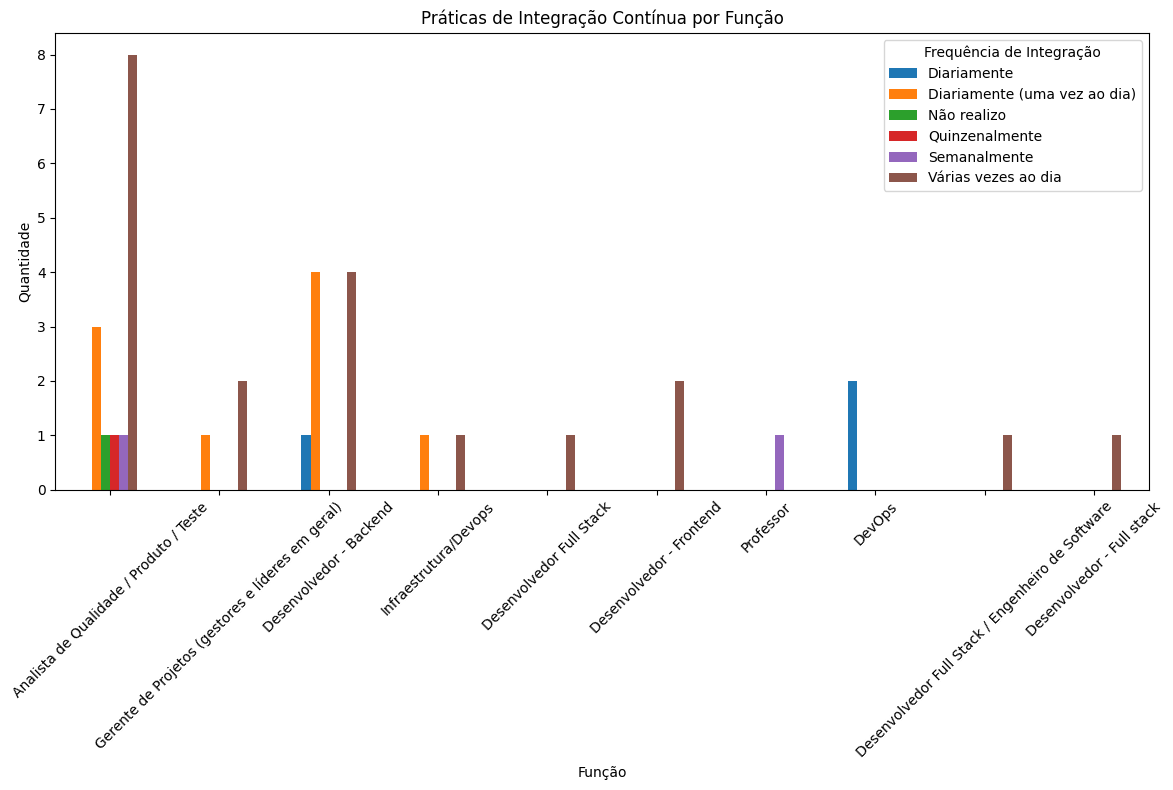

In [207]:
import matplotlib.pyplot as plt

# converte os dicionários para dataframe
frequencia_integracao_por_funcao_df = pd.DataFrame(frequencia_integracao_por_funcao).T
ferramentas_por_funcao_df = pd.DataFrame(ferramentas_por_funcao).T

# grafico frequencia integracao por funcao
frequencia_integracao_por_funcao_df.plot(kind='bar', figsize=(12, 8))
plt.title('Práticas de Integração Contínua por Função')
plt.xlabel('Função')
plt.ylabel('Quantidade')
plt.legend(title='Frequência de Integração')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Comparações entre funções para cada categoria de frequência de integração de código. É possível identificar se determinadas funções têm uma tendência maior a adotar práticas de integração contínua mais frequentes

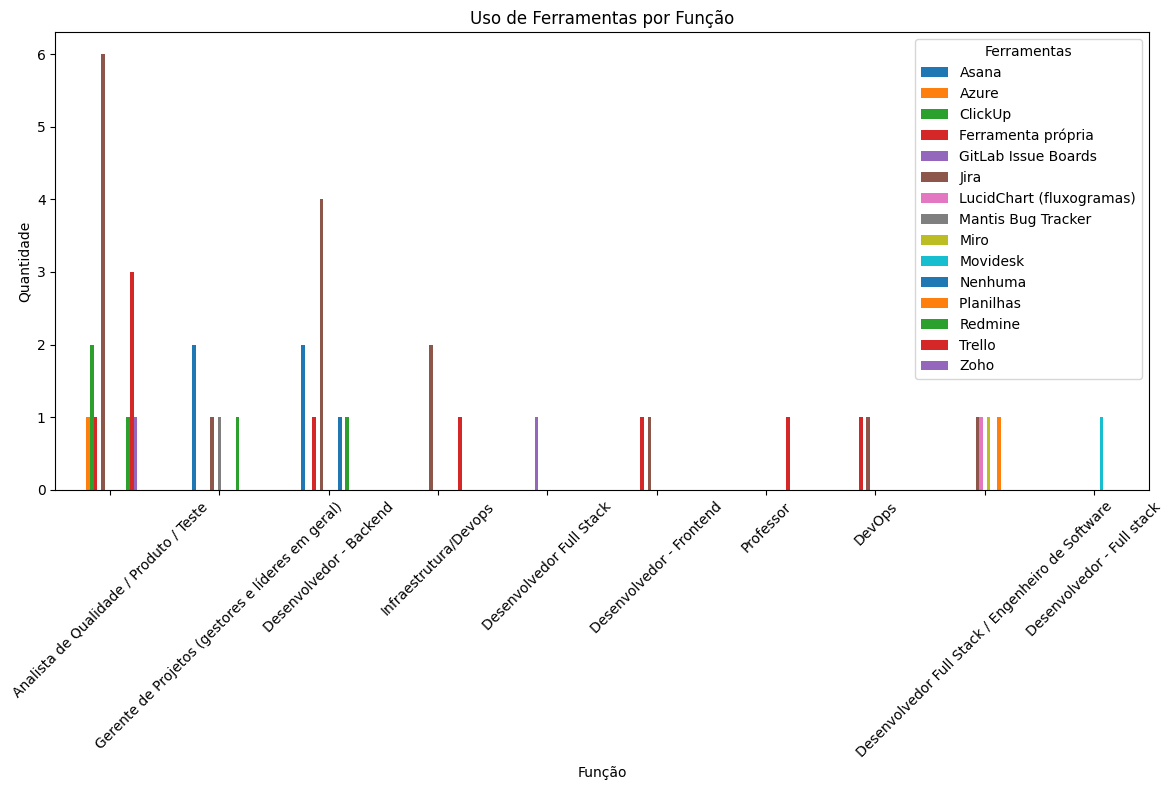

In [208]:
# grafico para uso de ferramentas
ferramentas_por_funcao_df.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Uso de Ferramentas por Função')
plt.xlabel('Função')
plt.ylabel('Quantidade')
plt.legend(title='Ferramentas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Permite ver quais ferramentas são mais populares para cada função e quais são menos utilizadas.

## QP3 - Como a frequência da integração contínua está relacionada ao nível de automação e eficiência da equipe?

In [209]:
freq_integracao = data['P7'].unique()

# Dicionário para armazenar o nível de automação por frequência de integração
automacao_por_freq_integracao = {}

for freq in freq_integracao:
    subset = data[data['P7'] == freq]
    nivel_automacao = subset['P8'].value_counts()
    automacao_por_freq_integracao[freq] = nivel_automacao

# Converter o dicionário em DataFrame
automacao_df = pd.DataFrame(automacao_por_freq_integracao).fillna(0)

# Mostrar os dados coletados
automacao_df


,Várias vezes ao dia,Quinzenalmente,Diariamente (uma vez ao dia),Não realizo,Semanalmente,Diariamente
P8,,,,,,
1,1,0.0,1.0,0.0,0.0,0.0
2,2,0.0,5.0,0.0,1.0,1.0
3,7,1.0,2.0,1.0,1.0,2.0
4,9,0.0,1.0,0.0,0.0,0.0
5,1,0.0,0.0,0.0,0.0,0.0


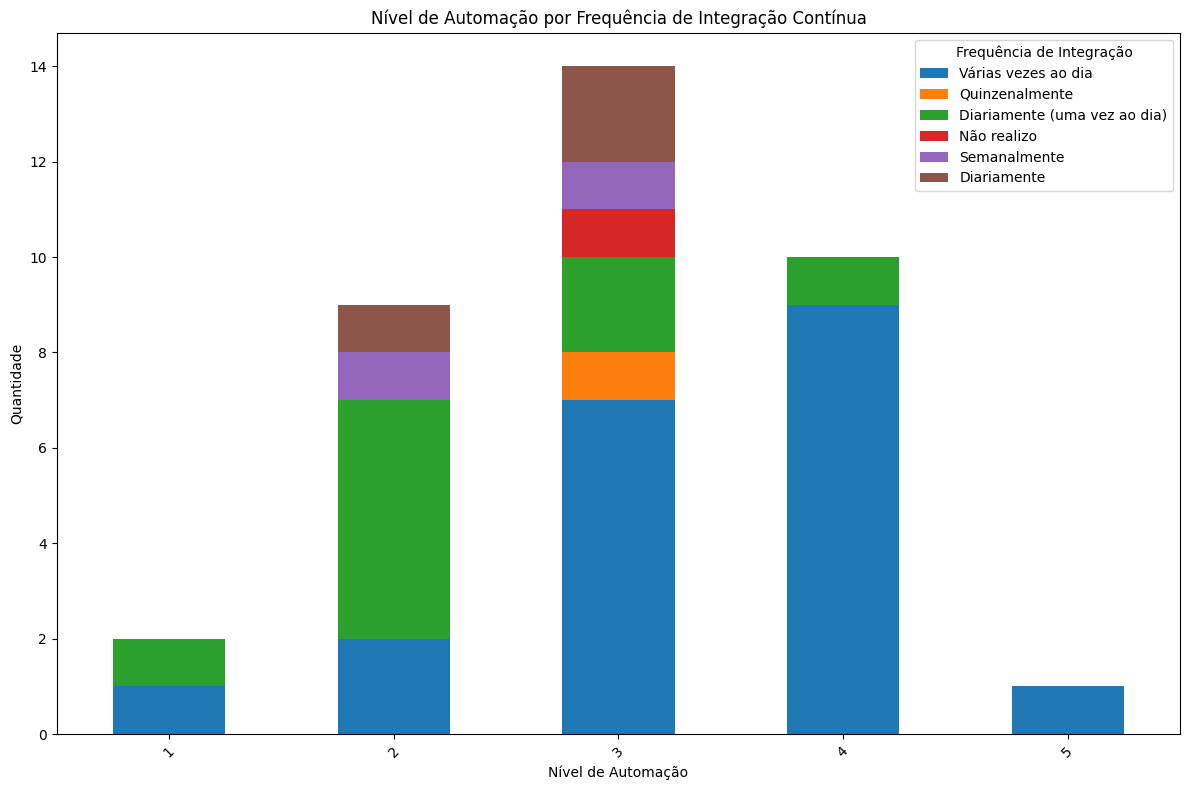

In [210]:
import matplotlib.pyplot as plt

# Gráfico de barras empilhadas para mostrar o nível de automação por frequência de integração
automacao_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Nível de Automação por Frequência de Integração Contínua')
plt.xlabel('Nível de Automação')
plt.ylabel('Quantidade')
plt.legend(title='Frequência de Integração')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Permite identificar se frequências mais altas de integração estão associadas a níveis mais altos de automação

## QP4 - Quais são os problemas mais comuns enfrentados pelas equipes de desenvolvimento em relação às ferramentas e práticas de integração? 

Foram carregadas 1544 palavras.


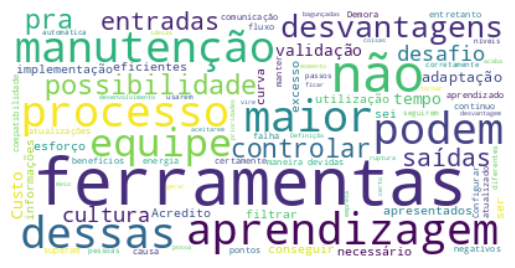

In [211]:
text = " ".join(resposta for resposta in data['P12'])
print ("Foram carregadas {} palavras.".format(len(text)))


from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
palavras_para_ignorar = [
    "a", "aí", "além", "ali", "algo", "alguma", "algumas", "algum", "alguns", 
    "am", "ante", "ao", "aos", "apenas", "após", "aquela", "aquelas", "aquele", 
    "aqueles", "aquilo", "as", "assim", "até", "aí", "bem", "com", "como", 
    "contra", "custa", "da", "das", "de", "dela", "dele", "deles", "demais", 
    "depois", "desde", "dessa", "desse", "desta", "deste", "detrás", "deve", 
    "devem", "devendo", "dever", "deverá", "deverão", "deverão", "deverem", 
    "deveria", "deveriam", "devia", "deviam", "disse", "disso", "diz", "dizem", 
    "dizer", "do", "dos", "durante", "e", "é", "ela", "elas", "ele", "eles", 
    "em", "branco", "enquanto", "entre", "era", "eram", "eramos", "essa", "essas", "esse", 
    "esses", "esta", "está", "estamos", "estão", "estas", "estava", "estavam", 
    "este", "estes", "eu", "fazendo", "fazer", "foi", "for", "foram", "fosse", 
    "fossem", "grande", "grandes", "há", "isso", "isto", "já", "lhe", "lhes", 
    "lo", "mas", "me", "mesma", "mesmas", "mesmo", "mesmos", "meu", "meus", 
    "minha", "minhas", "muito", "na", "nas", "nem", "no", "nos", "nós", "nossa", 
    "nossas", "nosso", "nossos", "num", "numa", "o", "os", "ou", "outra", 
    "outras", "outro", "outros", "para", "pela", "pelas", "pelo", "pelos", 
    "pode", "poder", "poderia", "poderiam", "podia", "podiam", "por", "porque", 
    "pouca", "poucas", "pouco", "poucos", "presente", "própria", "próprias", 
    "próprio", "próprios", "quais", "qual", "qualquer", "quando", "quanto", 
    "quantos", "que", "quem", "se", "seja", "sejam", "sem", "sempre", "sendo", 
    "será", "serão", "seu", "seus", "só", "sob", "sobre", "sua", "suas", 
    "talvez", "também", "te", "tem", "tendo", "tenha", "tenham", "tenho", "ter", 
    "teu", "teus", "tinha", "tinham", "toda", "todas", "todo", "todos", "tu", 
    "tua", "tuas", "tudo", "um", "uma", "umas", "uns", "vai", "vão", "você", 
    "vocês", "vos", "vossa", "vossas", "vosso", "vossos"]
stopwords.update(palavras_para_ignorar)


wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## QP5: Quais são as vantagens das equipes de desenvolvimento em relação às ferramentas e práticas de integração de código?

Foram carregadas 1756 palavras.


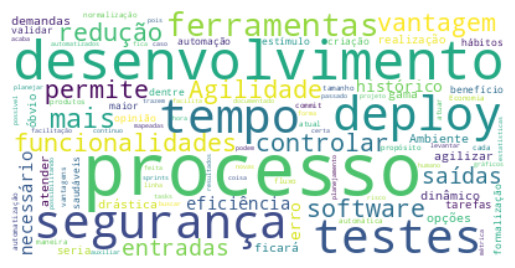

In [194]:
text = " ".join(resposta for resposta in data['P13'])
print ("Foram carregadas {} palavras.".format(len(text)))

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Análise estatística descritiva

Para começar, analisamos as perguntas com respostas quantitativas: P8 e P10.

- P8: Como você classificaria o nível de automação dos processos de desenvolvimento na sua equipe? 
- P10: Para você, qual a importância de um ambiente de desenvolvimento bem integrado e com boas ferramentas que atendam as demandas do dia a dia?

Podemos também transformar os dados da P3 numa escala numérica, para aplicar as medições
- P3: Qual o tamanho da equipe que você atua diretamente? (seu setor/squad)


### P8

In [149]:
# Media
media_p8 = data['P8'].mean()
print(f'Media: {media_p8}')

# Mediana
mediana_p8 = data['P8'].median()
print(f'Mediana: {mediana_p8}')

# Moda
from scipy.stats import mode
moda_p8 = mode(data['P8'])
print(f'Moda: {moda_p8[0]}')

# Desvio padrão
dp_p8 = data['P8'].std()
print(f'Desvio padrão: {dp_p8}')

# Variancia
variancia_p8 = data['P8'].var()
print(f'Variância: {variancia_p8}')

# Valores máximos e minimos
valor_maximo = data['P8'].max()
valor_minimo = data['P8'].min()
print(f'Valor máximo: {valor_maximo}')
print(f'Valor mínimo: {valor_minimo}')

# Separatrizes
sep_p8 = data['P8'].quantile([0.25, 0.5, 0.75]).to_dict(),
print(f'Separatrizes: {sep_p8}')

# Obliquidade
from scipy.stats import skew
obliq_p8 = skew(data['P8'])
print(f'Obliquidade: {obliq_p8}')

Media: 2.9722222222222223
Mediana: 3.0
Moda: 3
Desvio padrão: 0.9407022031018291
Variância: 0.8849206349206349
Valor máximo: 5
Valor mínimo: 1
Separatrizes: ({0.25: 2.0, 0.5: 3.0, 0.75: 4.0},)
Obliquidade: -0.15379387607158593


### P10

In [165]:
# Media
media_p10 = data['P10'].mean()
print(f'Media: {media_p10}')

# Mediana
mediana_p10 = data['P10'].median()
print(f'Mediana: {mediana_p10}')

# Moda
from scipy.stats import mode
moda_p10 = mode(data['P10'])
print(f'Moda: {moda_p10[0]}')

# Desvio padrão
dp_p10 = data['P10'].std()
print(f'Desvio padrão: {dp_p10}')

# Variancia
variancia_p10 = data['P10'].var()
print(f'Variância: {variancia_p10}')

# Valores máximos e minimos
valor_maximo = data['P10'].max()
valor_minimo = data['P10'].min()
print(f'Valor máximo: {valor_maximo}')
print(f'Valor mínimo: {valor_minimo}')

# Separatrizes
sep_p10 = data['P10'].quantile([0.25, 0.5, 0.75]).to_dict(),
print(f'Separatrizes: {sep_p10}')

# Obliquidade
from scipy.stats import skew
obliq_p10 = skew(data['P10'])
print(f'Obliquidade: {obliq_p10}')

Media: 4.888888888888889
Mediana: 5.0
Moda: 5
Desvio padrão: 0.3187276291558383
Variância: 0.1015873015873016
Valor máximo: 5
Valor mínimo: 4
Separatrizes: ({0.25: 5.0, 0.5: 5.0, 0.75: 5.0},)
Obliquidade: -2.47487373415292


### P3

Transformamos os dados para escala numérica:
- 1-5: 3
- 6-10: 8
- 11-20: 15
- 21-50: 35
- Mais de 50 pessoas: 50

In [151]:
mapeamento_tam_equipe = {
    '1-5': 3,
    '6-10': 8,
    '11-20': 15,
    '21-50': 35,
    'Mais de 50 pessoas': 50
}

data['P3_num'] = data['P3'].map(mapeamento_tam_equipe)

# Media
media_p3 = data['P3_num'].mean()
print(f'Media: {media_p3}')

# Mediana
mediana_p3 = data['P3_num'].median()
print(f'Mediana: {mediana_p3}')

# Moda
from scipy.stats import mode
moda_p3 = mode(data['P3_num'])
print(f'Moda: {moda_p3[0]}')

# Desvio padrão
dp_p3 = data['P3_num'].std()
print(f'Desvio padrão: {dp_p3}')

# Variancia
variancia_p3 = data['P3_num'].var()
print(f'Variância: {variancia_p3}')

# Valores máximos e minimos
valor_maximo = data['P3_num'].max()
valor_minimo = data['P3_num'].min()
print(f'Valor máximo: {valor_maximo}')
print(f'Valor mínimo: {valor_minimo}')

# Separatrizes
sep_p3 = data['P3_num'].quantile([0.25, 0.5, 0.75]).to_dict(),
print(f'Separatrizes: {sep_p3}')

# Obliquidade
from scipy.stats import skew
obliq_p3 = skew(data['P3_num'])
print(f'Obliquidade: {obliq_p3}')

Media: 8.527777777777779
Mediana: 8.0
Moda: 3
Desvio padrão: 9.49130763566963
Variância: 90.08492063492062
Valor máximo: 50
Valor mínimo: 3
Separatrizes: ({0.25: 3.0, 0.5: 8.0, 0.75: 8.0},)
Obliquidade: 2.994635375635109
